### Types of Cross Validation

1. K-fold Cross Validation: Splitting the dataset into k folds randomnly and use some of them as validation

2. Stratified k-Fold Cross Validation: Similar to k-fold cross validation, with a difference that it maintains the ratio of the classes in each k sets

3. Hold out based validation: Hold a part of dataset for validation and rest for training (generally used in time series data)

4. leave one out cross validation

5. Group k-fold cross validation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

df.loc[:,"quality"] = df.quality.map(quality_mapping)

Visualizing the class balance for wine dataset

Text(0, 0.5, 'Count')

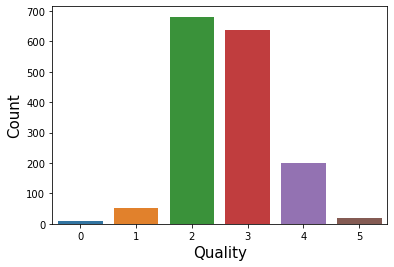

In [4]:
bar_plot = sns.countplot(x='quality',data=df)
bar_plot.set_xlabel("Quality", fontsize=15)
bar_plot.set_ylabel("Count", fontsize=15)

Applying stratified K-fold in Wines dataset

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [6]:
df["k_fold"] = -1

In [7]:
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
y = df.quality.values

In [9]:
skf = model_selection.StratifiedKFold(n_splits=5)

In [10]:
for f, (train_,val_) in enumerate(skf.split(X=df,y=y)):
    df.loc[val_,"k_fold"] = f

df.to_csv("wine_stratified_k_fold.csv", index=False)

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_fold
0,8.1,0.290,0.36,2.2,0.048,35.0,53.0,0.99500,3.27,1.01,12.4,4,0
1,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,0,0
2,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,2,0
3,7.1,0.690,0.08,2.1,0.063,42.0,52.0,0.99608,3.42,0.60,10.2,3,0
4,8.7,0.460,0.31,2.5,0.126,24.0,64.0,0.99746,3.10,0.74,9.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,9.3,0.380,0.48,3.8,0.132,3.0,11.0,0.99577,3.23,0.57,13.2,3,4
1595,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,2,4
1596,7.6,0.510,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.2,3,4
1597,11.9,0.580,0.58,1.9,0.071,5.0,18.0,0.99800,3.09,0.63,10.0,3,4
